In [3]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
import numpy as np
import albumentations as A
from PIL import Image

In [2]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)

/home/user/anaconda3/envs/envi/lib/python3.7/site-packages/mxnet/gluon/block.py:1389: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [ ]:
from mxnet.gluon.data.vision import transforms

In [ ]:
transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [13]:
im = Image.open("/home/user/Desktop/myfacee.jpg")

In [18]:
im.size

(805, 779)

In [16]:
from gluoncv.data.transforms.presets.ssd import SSDDefaultValTransform

In [20]:
tr = SSDDefaultValTransform(*im.size)

In [25]:
tr(np.array(im, None))

TypeError: __call__() missing 1 required positional argument: 'label'

In [28]:
!ls models

gl.py  the-street-rev.jpg


In [32]:
ii = Image.open('models/the-street-rev.jpg')

In [36]:
from mxnet import nd

In [37]:
x, img = data.transforms.presets.ssd.transform_test(nd.array(ii), short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 911)


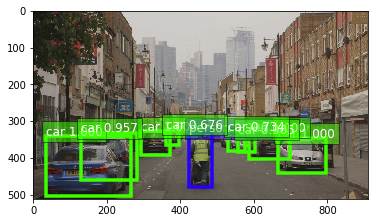

In [31]:
class_IDs, scores, bounding_boxes = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()
